In [1]:
"""
藉由分析住宿者是入住前就可以蒐集的資料，預測最後的這筆訂單是否會取消?
"""

'\n藉由分析住宿者是入住前就可以蒐集的資料，預測最後的這筆訂單是否會取消?\n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [3]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.dropna()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,...,No Deposit,240.0,113.0,0,Transient,82.00,1,1,Check-Out,2015-10-13
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,...,No Deposit,185.0,281.0,0,Transient-Party,52.20,0,0,Check-Out,2015-11-17
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,...,No Deposit,334.0,281.0,0,Transient-Party,48.00,0,0,Check-Out,2015-11-06
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,...,No Deposit,328.0,281.0,0,Transient-Party,40.00,0,0,Check-Out,2015-11-15
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,No Deposit,326.0,281.0,0,Transient-Party,48.00,0,0,Check-Out,2015-11-16
2879,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,No Deposit,326.0,281.0,0,Transient,48.00,0,0,Check-Out,2015-11-16
2880,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,No Deposit,334.0,281.0,0,Transient-Party,48.00,0,0,Check-Out,2015-11-16
2881,Resort Hotel,0,24,2015,November,45,3,3,10,1,...,No Deposit,328.0,281.0,0,Transient,40.00,0,0,Check-Out,2015-11-16
2882,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,No Deposit,326.0,281.0,0,Transient,48.00,0,0,Check-Out,2015-11-16
2883,Resort Hotel,0,24,2015,November,45,3,3,10,1,...,No Deposit,334.0,281.0,0,Transient-Party,40.00,0,0,Check-Out,2015-11-16


In [5]:
df.shape

(119390, 32)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
for column in df.columns:
    print("In {}".format(column))
    if len(df[column].unique()) < 10:
        for value in df[column].unique():
            print("\tQuantity of the value is {} have {}".format(value, df[df[column]==value].shape[0]))

In hotel
	Quantity of the value is Resort Hotel have 40060
	Quantity of the value is City Hotel have 79330
In is_canceled
	Quantity of the value is 0 have 75166
	Quantity of the value is 1 have 44224
In lead_time
In arrival_date_year
	Quantity of the value is 2015 have 21996
	Quantity of the value is 2016 have 56707
	Quantity of the value is 2017 have 40687
In arrival_date_month
In arrival_date_week_number
In arrival_date_day_of_month
In stays_in_weekend_nights
In stays_in_week_nights
In adults
In children
	Quantity of the value is 0.0 have 110796
	Quantity of the value is 1.0 have 4861
	Quantity of the value is 2.0 have 3652
	Quantity of the value is 10.0 have 1
	Quantity of the value is 3.0 have 76
	Quantity of the value is nan have 0
In babies
	Quantity of the value is 0 have 118473
	Quantity of the value is 1 have 900
	Quantity of the value is 2 have 15
	Quantity of the value is 10 have 1
	Quantity of the value is 9 have 1
In meal
	Quantity of the value is BB have 92310
	Quantity o

# Combine the duplicate or not using columns

In [9]:
df["number_of_staying_day"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df = df.drop(columns=["stays_in_weekend_nights", "stays_in_week_nights"])

In [10]:
"""
the reason of dropping the column:
------------------------------------
deposit_type: it isn't about money.
required_car_parking_spaces: The almost record value is 0.
agent: this columns means agent ID, I think that hasn't too much use.
company: this columns means company ID, I think that hasn't too much use.
previous_cancellations: we can konw the customer canceled or not from "is_canceled" column.
previous_bookings_not_canceled: we can konw the customer canceled or not from "is_canceled" column.
is_repeated_guest: it doesn't about money directly.
days_in_waiting_list: it doesn't about money directly.
arrival_date_week_number: we can know this values by other columns.
distribution_channel: it doesn't about money directly.
"""
df = df.drop(columns=["deposit_type", "required_car_parking_spaces", "agent", "company", 'previous_cancellations',
       'previous_bookings_not_canceled', "is_repeated_guest", "arrival_date_week_number"])

# Combine the value about arrival date(year, month, date)

In [11]:
#MONTH DICTIONARY
MONTH_DICTIONARY = {"January": "01", "February":"02", "March":"03", "April":"04", "May":"05", "June":"06",
                    "July":"07", "August":"08", "September":"09", "October":"10", "November":"11", "December":"12"}

#change the value in arrival_data_month
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: MONTH_DICTIONARY[x])

#create the value in arrival_data
hour_min_sec = " 12:00:00"
df['arrival_date'] = df["arrival_date_year"].astype("str") + "-" +df["arrival_date_month"] + "-" + \
                        df["arrival_date_day_of_month"].astype("str") + hour_min_sec

#create timestamp by transform arrival date to timestamp (pd.timestamp)
#datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')
df["timestamp"] = df.apply(lambda record: datetime.strptime(record["arrival_date"], "%Y-%m-%d %H:%M:%S").timestamp(), axis=1)

#drop the duplicate 
#df.drop(columns=["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"])

In [12]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'days_in_waiting_list', 'customer_type', 'adr',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'number_of_staying_day', 'arrival_date',
       'timestamp'],
      dtype='object')

In [13]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,meal,...,booking_changes,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date,number_of_staying_day,arrival_date,timestamp
0,Resort Hotel,0,342,2015,07,1,2,0.0,0,BB,...,3,0,Transient,0.0,0,Check-Out,2015-07-01,0,2015-07-1 12:00:00,1.435723e+09
1,Resort Hotel,0,737,2015,07,1,2,0.0,0,BB,...,4,0,Transient,0.0,0,Check-Out,2015-07-01,0,2015-07-1 12:00:00,1.435723e+09
2,Resort Hotel,0,7,2015,07,1,1,0.0,0,BB,...,0,0,Transient,75.0,0,Check-Out,2015-07-02,1,2015-07-1 12:00:00,1.435723e+09
3,Resort Hotel,0,13,2015,07,1,1,0.0,0,BB,...,0,0,Transient,75.0,0,Check-Out,2015-07-02,1,2015-07-1 12:00:00,1.435723e+09
4,Resort Hotel,0,14,2015,07,1,2,0.0,0,BB,...,0,0,Transient,98.0,1,Check-Out,2015-07-03,2,2015-07-1 12:00:00,1.435723e+09


# Chose the Inforamtion that hotel can recept before the customer check in.

In [14]:
#this columns could be know before customers check in
#we can change []
info_before_check_in_columns = ["hotel", "is_canceled", "lead_time", "number_of_staying_day","adults",
                                "children", "babies", "reserved_room_type", "meal", "customer_type", "adr", "timestamp"]

info_after_check_in_columns = ["assigned_room_type", 'reservation_status', 'reservation_status_date']

In [15]:
df_ibci = df[info_before_check_in_columns]
df_ibci.head()

,hotel,is_canceled,lead_time,number_of_staying_day,adults,children,babies,reserved_room_type,meal,customer_type,adr,timestamp
0,Resort Hotel,0,342,0,2,0.0,0,C,BB,Transient,0.0,1.435723e+09
1,Resort Hotel,0,737,0,2,0.0,0,C,BB,Transient,0.0,1.435723e+09
2,Resort Hotel,0,7,1,1,0.0,0,A,BB,Transient,75.0,1.435723e+09
3,Resort Hotel,0,13,1,1,0.0,0,A,BB,Transient,75.0,1.435723e+09
4,Resort Hotel,0,14,2,2,0.0,0,A,BB,Transient,98.0,1.435723e+09


# Encode the column which values type is not integer or float

In [16]:
from sklearn.preprocessing import LabelEncoder 

In [17]:
hotel_le = LabelEncoder()
meal_le = LabelEncoder()
customerType_le = LabelEncoder()
df_ibci['meal'] = meal_le.fit_transform(df_ibci["meal"])
df_ibci["customer_type"] = customerType_le.fit_transform(df_ibci["customer_type"])
df_ibci["hotel"] = hotel_le.fit_transform(df_ibci["hotel"])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be s

In [18]:
df_ibci.head()

,hotel,is_canceled,lead_time,number_of_staying_day,adults,children,babies,reserved_room_type,meal,customer_type,adr,timestamp
0,1,0,342,0,2,0.0,0,C,0,2,0.0,1.435723e+09
1,1,0,737,0,2,0.0,0,C,0,2,0.0,1.435723e+09
2,1,0,7,1,1,0.0,0,A,0,2,75.0,1.435723e+09
3,1,0,13,1,1,0.0,0,A,0,2,75.0,1.435723e+09
4,1,0,14,2,2,0.0,0,A,0,2,98.0,1.435723e+09


# Plot the the corelation coefficient heatmap 

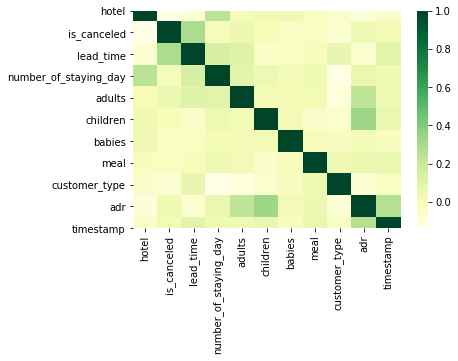

In [19]:
sns.heatmap(df_ibci.corr(), cmap="YlGn")

# Is canceled

Text(0, 0.5, 'Quantity of data')

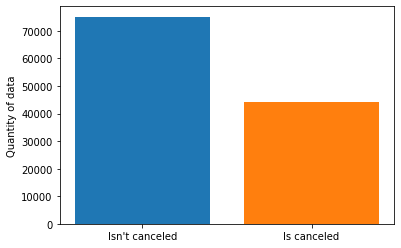

In [20]:
#print(hotel_le.classes_)
plt.bar("Isn't canceled", df_ibci[df_ibci["is_canceled"]==0]["is_canceled"].shape[0])
plt.bar("Is canceled", df_ibci[df_ibci["is_canceled"]==1]["is_canceled"].shape[0])
plt.ylabel("Quantity of data")

# Lead time and Adr

Text(0.5, 1.0, 'In Resort Hotel')

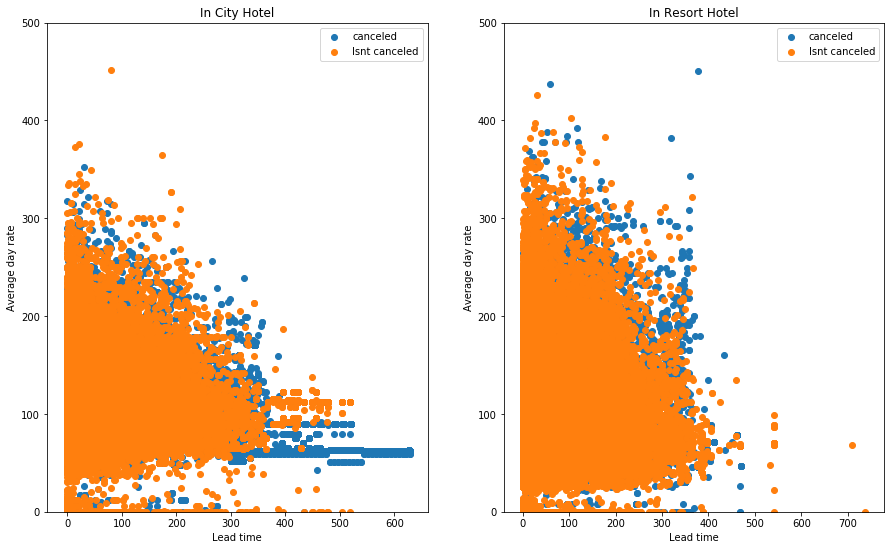

In [21]:
city_hotel_condition = df_ibci["hotel"] == 0
resort_hotel_condition = df_ibci['hotel'] == 1
isnt_canceled_condition = df_ibci["is_canceled"] == 0
is_canceled_condition = df_ibci["is_canceled"] == 1

fig = plt.figure(figsize = (15, 9))
ax = plt.subplot(121)
plt.scatter(df_ibci[is_canceled_condition&city_hotel_condition]["lead_time"],
            df_ibci[is_canceled_condition&city_hotel_condition]["adr"], label='canceled')
plt.scatter(df_ibci[isnt_canceled_condition&city_hotel_condition]["lead_time"], 
            df_ibci[isnt_canceled_condition&city_hotel_condition]["adr"],label='Isnt canceled')
plt.ylim([0, 500])
plt.xlabel("Lead time")
plt.ylabel("Average day rate")
plt.title("In City Hotel")
plt.legend(loc='best')

ax = plt.subplot(122)
plt.scatter(df_ibci[is_canceled_condition&resort_hotel_condition]["lead_time"],
            df_ibci[is_canceled_condition&resort_hotel_condition]["adr"], label='canceled')
plt.scatter(df_ibci[isnt_canceled_condition&resort_hotel_condition]["lead_time"], 
            df_ibci[isnt_canceled_condition&resort_hotel_condition]["adr"],label='Isnt canceled')

plt.ylim([0, 500])
plt.xlabel("Lead time")
plt.ylabel("Average day rate")
plt.legend(loc='best')
plt.title("In Resort Hotel")

# Number of staying day

Text(0.5, 1.0, 'In resort hotel')

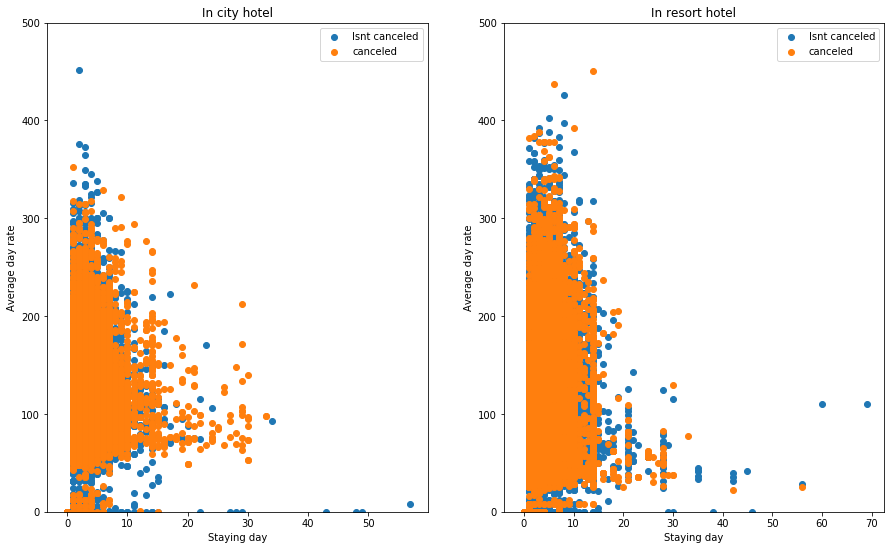

In [22]:
city_hotel_condition = df_ibci["hotel"] == 0
resort_hotel_condition = df_ibci['hotel'] == 1
isnt_canceled_condition = df_ibci["is_canceled"] == 0
is_canceled_condition = df_ibci["is_canceled"] == 1


fig = plt.figure(figsize=(15, 9))
plt.subplot(121)
plt.scatter(df_ibci[isnt_canceled_condition&city_hotel_condition]["number_of_staying_day"], 
            df_ibci[isnt_canceled_condition&city_hotel_condition]["adr"], label='Isnt canceled')
plt.scatter(df_ibci[is_canceled_condition&city_hotel_condition]["number_of_staying_day"], 
            df_ibci[is_canceled_condition&city_hotel_condition]["adr"], label='canceled')
plt.ylim([0, 500])
plt.xlabel("Staying day")
plt.ylabel("Average day rate")
plt.legend(loc='best') 
plt.title("In city hotel")

plt.subplot(122)
plt.scatter(df_ibci[isnt_canceled_condition&resort_hotel_condition]["number_of_staying_day"], 
            df_ibci[isnt_canceled_condition&resort_hotel_condition]["adr"], label='Isnt canceled')
plt.scatter(df_ibci[is_canceled_condition&resort_hotel_condition]["number_of_staying_day"], 
            df_ibci[is_canceled_condition&resort_hotel_condition]["adr"], label='canceled')
plt.ylim([0, 500])
plt.xlabel("Staying day")
plt.ylabel("Average day rate")
plt.legend(loc='best') 
plt.title("In resort hotel")

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

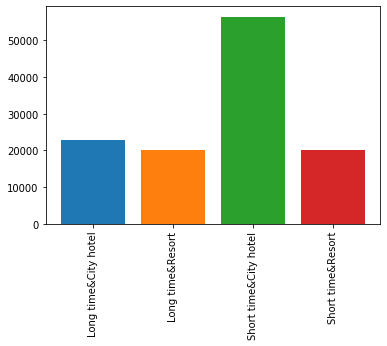

In [23]:
long_stay_condition = df_ibci["number_of_staying_day"]>=3.5
short_stay_condition = df_ibci["number_of_staying_day"] < 3.5
city_hotel_condition = df_ibci["hotel"] == 0
resort_hotel_condition = df_ibci['hotel'] == 1
stay_condition_dictionary = {"Long time": long_stay_condition, "Short time": short_stay_condition}
hotel_condition_dictionary = {"City hotel": city_hotel_condition, "Resort": resort_hotel_condition}
for stay_key, stay_condition in stay_condition_dictionary.items():
    for hotel_key, hotel_condition in hotel_condition_dictionary.items():
        label = stay_key+"&"+hotel_key
        plt.bar(label, df_ibci[stay_condition & hotel_condition].shape[0])
plt.xticks(rotation=90)

# How many people  in one record

Text(0, 0.5, 'Quantuty of Children')

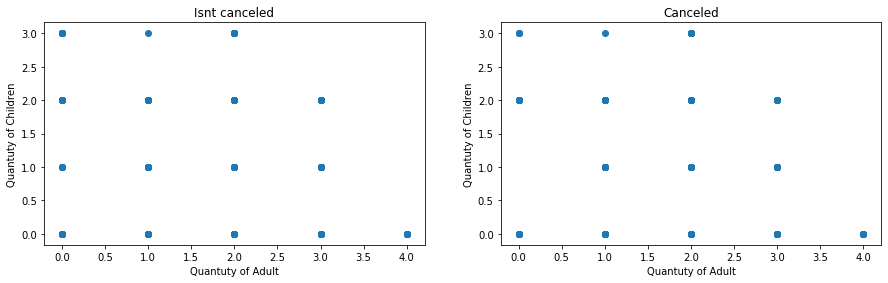

In [24]:
"""
面對非連續的數值，如果用scatter畫圖會很難看出數據的分布，該怎麼做比較好
"""
city_hotel_condition = df_ibci["hotel"] == 0
resort_hotel_condition = df_ibci['hotel'] == 1
isnt_canceled_condition = df_ibci["is_canceled"] == 0
is_canceled_condition = df_ibci["is_canceled"] == 1


#Adults
plt.figure(figsize=(15, 9))
plt.subplot(221)
plt.scatter(df_ibci[isnt_canceled_condition&city_hotel_condition]["adults"],
            df_ibci[isnt_canceled_condition&city_hotel_condition]["children"])
plt.title("Isnt canceled")
plt.xlabel("Quantuty of Adult")
plt.ylabel("Quantuty of Children")

plt.subplot(222)
plt.scatter(df_ibci[is_canceled_condition&city_hotel_condition]["adults"],
            df_ibci[is_canceled_condition&city_hotel_condition]["children"], label='Canceled')
plt.title('Canceled')
plt.xlabel("Quantuty of Adult")
plt.ylabel("Quantuty of Children")

Text(0, 0.5, 'Quantity of record')

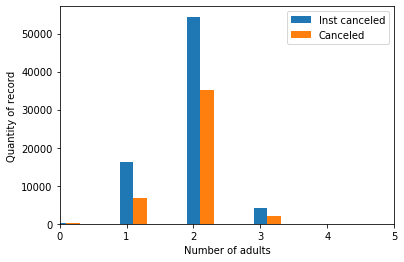

In [25]:
isnt_canceled_condition = df_ibci["is_canceled"] == 0
is_canceled_condition = df_ibci["is_canceled"] == 1
quantity_of_adults_isnt_canceled =[]
quantity_of_adults_is_cenceled =[]
for quantity in range((df_ibci["adults"].max())):
    quantity_condition = df_ibci['adults'] == quantity
    quantity_of_adults_isnt_canceled.append(df_ibci[quantity_condition & isnt_canceled_condition].shape[0])
    quantity_of_adults_is_cenceled.append(df_ibci[quantity_condition&is_canceled_condition].shape[0])

plt.bar(range((df_ibci["adults"].max())), quantity_of_adults_isnt_canceled, 0.2,label="Inst canceled")
plt.bar([quantity + 0.2 for quantity in range((df_ibci["adults"].max()))], 
        quantity_of_adults_is_cenceled, 0.2,label='Canceled')
plt.xlim([0,5])
plt.legend(loc='best')
plt.xlabel("Number of adults")
plt.ylabel("Quantity of record")

Text(0, 0.5, 'Quantity of record')

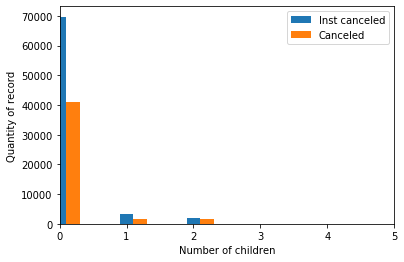

In [26]:
#Children
quantity_of_children_isnt_canceled =[]
quantity_of_children_is_canceled =[]
for quantity in range(int(df_ibci["children"].max())):
    quantity_condition = df_ibci['children'] == quantity
    quantity_of_children_isnt_canceled.append(df_ibci[quantity_condition & isnt_canceled_condition].shape[0])
    quantity_of_children_is_canceled.append(df_ibci[quantity_condition&is_canceled_condition].shape[0])

plt.bar(range(int(df_ibci["children"].max())), quantity_of_children_isnt_canceled, 0.2,label="Inst canceled")
plt.bar([quantity + 0.2 for quantity in range(int(df_ibci["children"].max()))], 
        quantity_of_children_is_canceled, 0.2,label='Canceled')
plt.xlim([0,5])
plt.legend(loc='best')
plt.xlabel("Number of children")
plt.ylabel("Quantity of record")

Text(0, 0.5, 'Quantity of record')

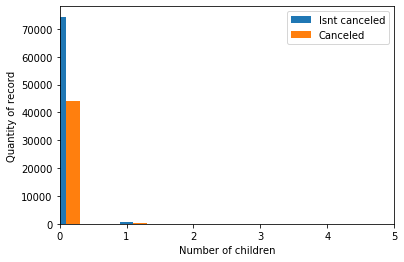

In [27]:
#Baby
quantity_of_babies_isnt_canceled =[]
quantity_of_babies_is_canceled =[]
for quantity in range(int(df_ibci["babies"].max())):
    quantity_condition = df_ibci['babies'] == quantity
    quantity_of_babies_isnt_canceled.append(df_ibci[quantity_condition & isnt_canceled_condition].shape[0])
    quantity_of_babies_is_canceled.append(df_ibci[quantity_condition&is_canceled_condition].shape[0])

plt.bar(range(int(df_ibci["babies"].max())), quantity_of_babies_isnt_canceled, 0.2,label="Isnt canceled")
plt.bar([quantity + 0.2 for quantity in range(int(df_ibci["babies"].max()))], 
        quantity_of_babies_is_canceled, 0.2,label='Canceled')
plt.xlim([0,5])
plt.legend(loc='best')
plt.xlabel("Number of children")
plt.ylabel("Quantity of record")

# What kind of meal does the customer eat?


In [28]:
meal_le.classes_

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

([<matplotlib.axis.XTick at 0x1912fa21fd0>,
 <a list of 5 Text xticklabel objects>)

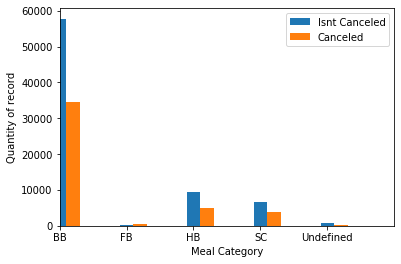

In [29]:
quantity_of_meal_isnt_canceled =[]
quantity_of_meal_is_canceled =[]
for index in range(5):
    quantity_condition = df_ibci['meal'] == index
    quantity_of_meal_isnt_canceled.append(df_ibci[quantity_condition & isnt_canceled_condition].shape[0])
    quantity_of_meal_is_canceled.append(df_ibci[quantity_condition & is_canceled_condition].shape[0])

plt.bar(range(len(df_ibci["meal"].unique())), quantity_of_meal_isnt_canceled, 0.2,label="Isnt Canceled")
plt.bar([index + 0.2 for index in range(len(df_ibci["meal"].unique()))], 
         quantity_of_meal_is_canceled, 0.2,label='Canceled')
plt.xlim([0,5])
plt.legend(loc='best')
plt.xlabel("Meal Category")
plt.ylabel("Quantity of record")
plt.xticks(np.arange(5), ['BB', 'FB', 'HB', 'SC', 'Undefined'])

# What kind of customer type  in city hotel and resort hotel?

In [30]:
customerType_le.classes_

array(['Contract', 'Group', 'Transient', 'Transient-Party'], dtype=object)

([<matplotlib.axis.XTick at 0x1912faa2b70>,
 <a list of 4 Text xticklabel objects>)

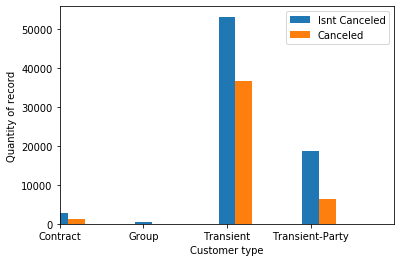

In [31]:
quantity_of_customer_isnt_canceled=[]
quantity_of_customer_is_canceled =[]
for index in range(4):
    quantity_condition = df_ibci['customer_type'] == index
    quantity_of_customer_isnt_canceled.append(df_ibci[quantity_condition & isnt_canceled_condition].shape[0])
    quantity_of_customer_is_canceled.append(df_ibci[quantity_condition & is_canceled_condition].shape[0])

plt.bar(range(len(df_ibci["customer_type"].unique())), quantity_of_customer_isnt_canceled, 0.2,label="Isnt Canceled")
plt.bar([index + 0.2 for index in range(len(df_ibci["customer_type"].unique()))], 
         quantity_of_customer_is_canceled, 0.2,label='Canceled')
plt.xlim([0,4])
plt.legend(loc='best')
plt.xlabel("Customer type")
plt.ylabel("Quantity of record")
plt.xticks(np.arange(4), ['Contract', 'Group', 'Transient', 'Transient-Party'])

# City Hotel or Resort Hotel

in_resort_hotel = df["hotel"]=="Resort Hotel"
in_city_hotel = df["hotel"] == "City Hotel"
quantity_of_city_hotel_in_one_year = []
quantity_of_resort_hotel_in_one_year = []
for year in [ 2015, 2016, 2017]:
    year_condition = df["arrival_date_year"] == year
    quantity_of_city_hotel_in_one_year.append(df[in_city_hotel & year_condition].shape[0])
    quantity_of_resort_hotel_in_one_year.append(df[in_resort_hotel & year_condition].shape[0])
plt.bar(["2015", "2016", "2017"], quantity_of_city_hotel_in_one_year, label='In City')
plt.bar(["2015", "2016", "2017"], quantity_of_resort_hotel_in_one_year, label='In Resort')
plt.xlabel('year')
plt.ylabel("Quantity of booking")
plt.title("Quantity in booking different hotel in each year")
plt.legend(loc='best')
"""
Conclusion:
"""

'\nConclusion:\n'

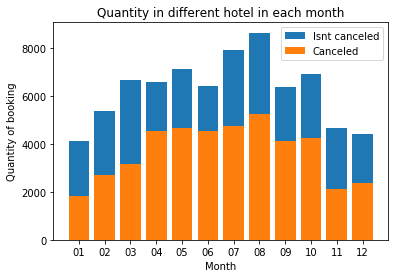

In [32]:
quantity_of_isnt_canceled_each_month = []
quantity_of_is_canceled_each_month = []
for month in MONTH_DICTIONARY.values():
    in_withch_month = df["arrival_date_month"] == month
    quantity_of_isnt_canceled_each_month.append(df[ isnt_canceled_condition & in_withch_month].shape[0])
    quantity_of_is_canceled_each_month.append(df[ is_canceled_condition & in_withch_month].shape[0])
plt.bar( MONTH_DICTIONARY.values(), quantity_of_isnt_canceled_each_month, label='Isnt canceled')
plt.bar( MONTH_DICTIONARY.values(), quantity_of_is_canceled_each_month, label='Canceled')
plt.xlabel("Month")
plt.ylabel("Quantity of booking")
plt.title("Quantity in different hotel in each month")
plt.legend(loc='best')
"""
Conclusion:
"""

# What time do people cancel the booking

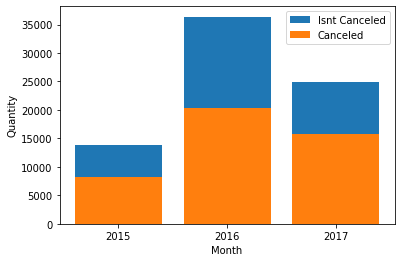

In [33]:
is_canceled = df["is_canceled"] == 1
is_not_canceled = df['is_canceled'] == 0
quantity_of_canceled_in_each_year = []
quantity_of_isnt_canceled_in_each_year = []

for year in [2015, 2016, 2017]:
    year_condition = df["arrival_date_year"] == year
    quantity_of_canceled_in_each_year.append(df[is_canceled & year_condition].shape[0])
    quantity_of_isnt_canceled_in_each_year.append(df[is_not_canceled & year_condition].shape[0])
plt.bar(["2015", '2016', '2017'], quantity_of_isnt_canceled_in_each_year, label="Isnt Canceled")    
plt.bar(["2015", '2016', '2017'], quantity_of_canceled_in_each_year, label="Canceled")
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.legend(loc='best')

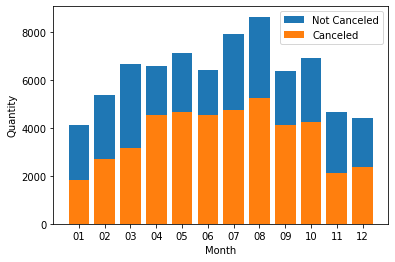

In [34]:
quantity_of_canceled_in_each_month = []
quantity_of_isnt_canceled_in_each_month = []

for month in MONTH_DICTIONARY.values():
    month_condition = df["arrival_date_month"] == month
    quantity_of_canceled_in_each_month.append(df[is_canceled & month_condition].shape[0])
    quantity_of_isnt_canceled_in_each_month.append(df[is_not_canceled & month_condition].shape[0])
plt.bar(MONTH_DICTIONARY.values(), quantity_of_isnt_canceled_in_each_month, label="Not Canceled")    
plt.bar(MONTH_DICTIONARY.values(), quantity_of_canceled_in_each_month, label="Canceled")
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.legend(loc='best')